In [20]:
! pip install --upgrade --user numpy scipy matplotlib ipython jupyter pandas sympy
! pip install --user --upgrade pixiedust
! pip install --user --upgrade statsmodels

Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: matplotlib in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: jupyter in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s2a1-a4a4fc7ce6bf65-e89a3fdacf4a/.local/lib/python2.7/site-packages
Requirement already up-to-date: sympy in /gpfs/global_fs01/s

In [143]:
from io import StringIO
from scipy import signal
from matplotlib import pylab as pl
from mpl_toolkits.mplot3d.axes3d import Axes3D
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pixiedust
from statsmodels.tsa.stattools import adfuller
from scipy.fftpack import fft, ifft, irfft, fftfreq, rfft
from scipy.signal import blackman,find_peaks_cwt

In [3]:
# The code was removed by DSX for sharing.

In [4]:
timesec=np.arange(1,660,1)
respPre=np.squeeze(np.asarray(np.delete(dfpre.values,[0,1],axis=1)))
respPost =np.squeeze(np.asarray(np.delete(dfpost.values,[0,1],axis=1)))
print(respPre.size)
print(respPost.size)
print(timesec.size)

659
659
659



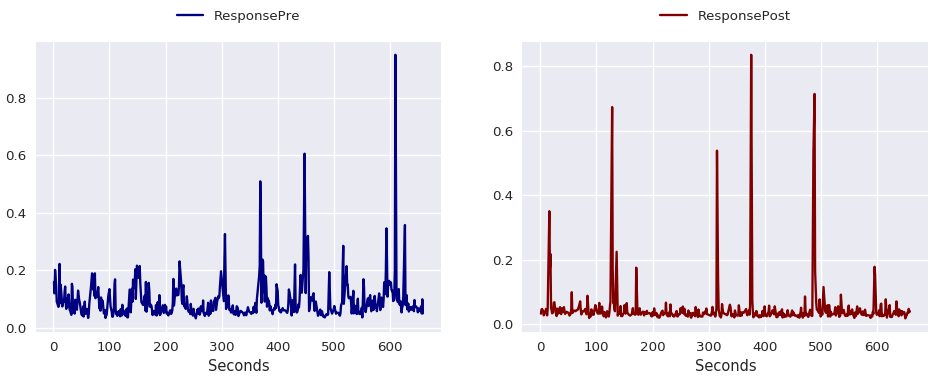

In [5]:
pd_signals=pd.DataFrame(data={'ResponsePre':respPre, 'ResponsePost':respPost,'Seconds':timesec},dtype=float)
display(pd_signals)

In [6]:
f, Pxx_spec = signal.welch(respPre, window ='boxcar',fs=1.0,nperseg =256,  scaling='spectrum') 
f1, Pxx_spec1 = signal.welch(respPost, window ='boxcar',fs=1.0, nperseg =256,  scaling='spectrum')


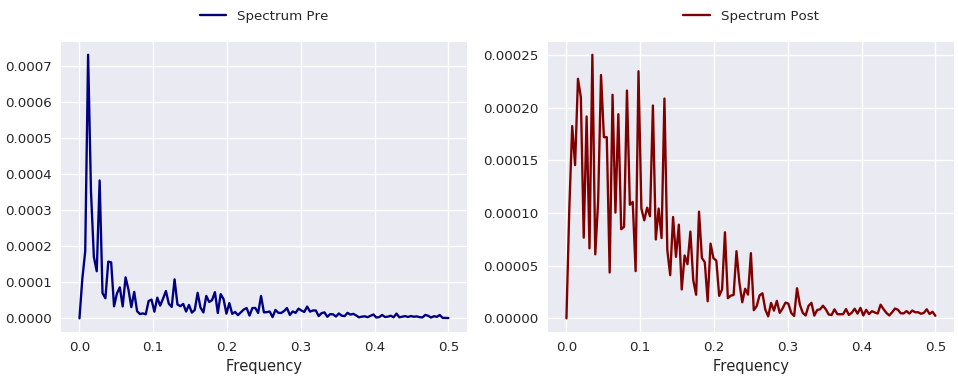

In [7]:
pd_spectre=pd.DataFrame(data={'Spectrum Pre':np.squeeze(np.absolute(Pxx_spec)), 'Spectrum Post':np.squeeze(np.absolute(Pxx_spec1)),'Frequency':f},dtype=float)
display(pd_spectre)

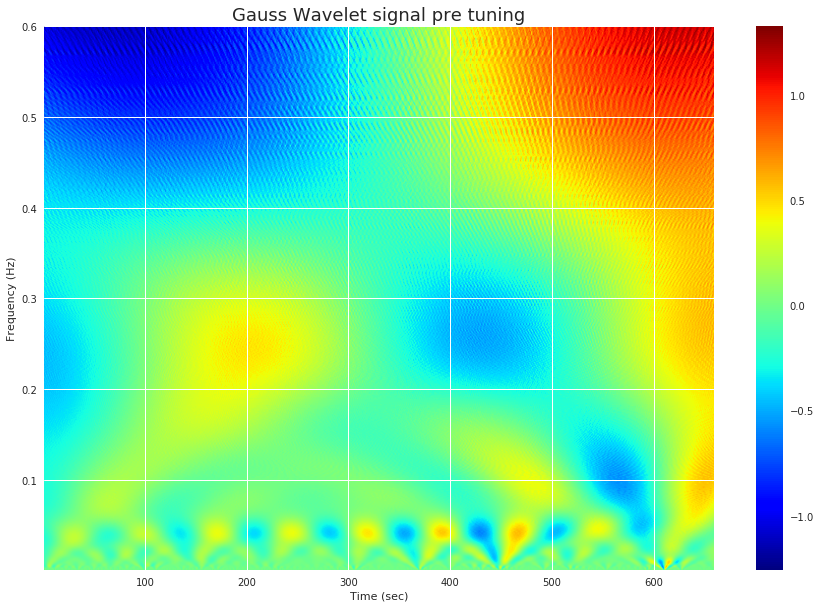

In [139]:
cwtmatr_pre, freqs = pywt.cwt(respPre, timesec, 'gaus7')
plt.figure(figsize = (15,10))
im = plt.imshow(cwtmatr_pre, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal pre tuning', fontsize=18)
plt.show() 

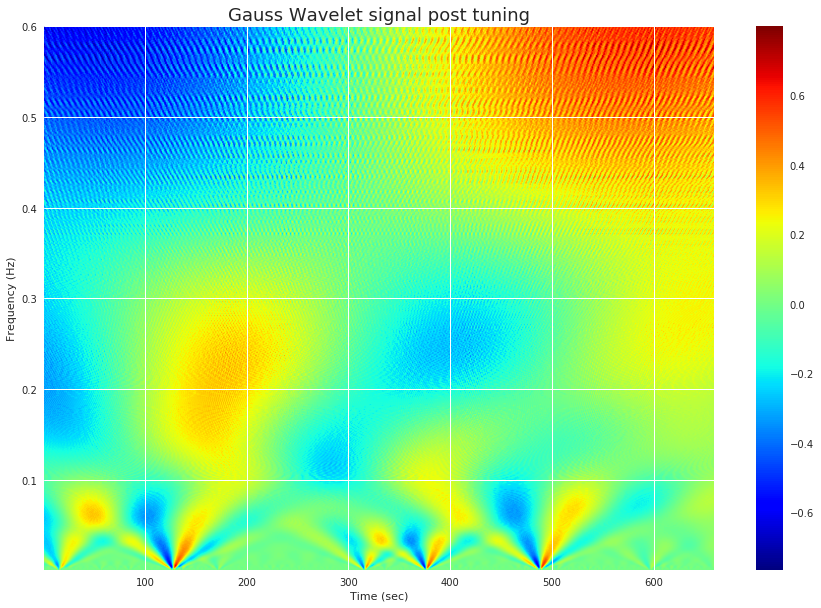

In [138]:
cwtmatr_post, freqs = pywt.cwt(respPost, timesec, 'gaus7')
plt.figure(figsize = (15,10))
im = plt.imshow(cwtmatr_post, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal post tuning', fontsize=18)
plt.show() 

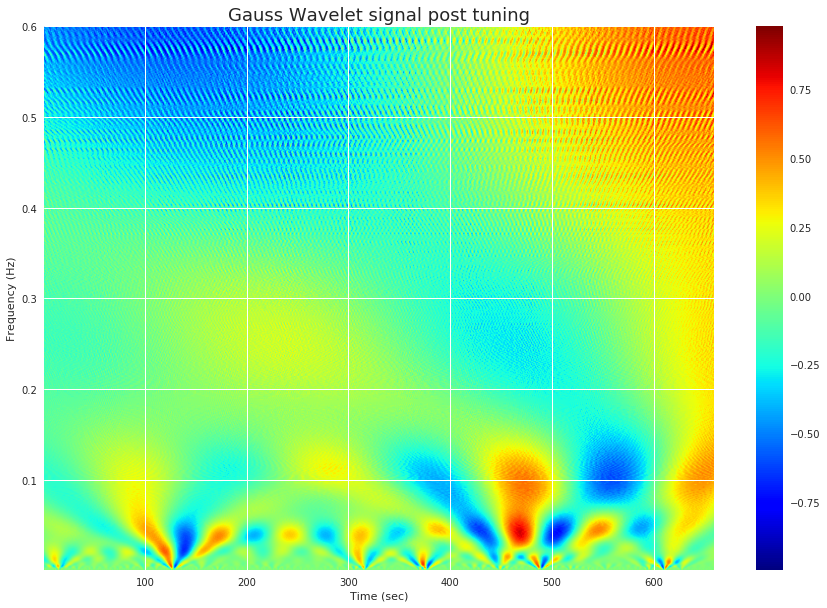

In [140]:
cwtmatr_dd = cwtmatr_pre - cwtmatr_post
plt.figure(figsize = (15,10))
im = plt.imshow(cwtmatr_dd, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal post tuning', fontsize=18)
plt.show() 

In [ ]:
#try to isolate in pre signal spike using 2 steps filtering:
# 0> Verify stationariety
# 1> Eliminate with a frequency band filtering harmonic component
# 2> reconstructing signal with inverse FFT 
# 3> evaluate mean and STD after filterin
# 4> calculate Wavelet Gauss 7 and subtract to this the one with noise with same mean and STD 
# 5> BINGO !

In [22]:
# 0> Verify stationariety (OK)
result = adfuller(respPre)
print('response with SPIKE ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

response with SPIKE ADF Statistic: -7.178168
p-value: 0.000000
Critical Values:
	5%: -2.866
	1%: -3.440
	10%: -2.569


In [ ]:
# 1> Eliminate with a frequency band filtering harmonic component (using FFT frequency filter with blackman windowing)

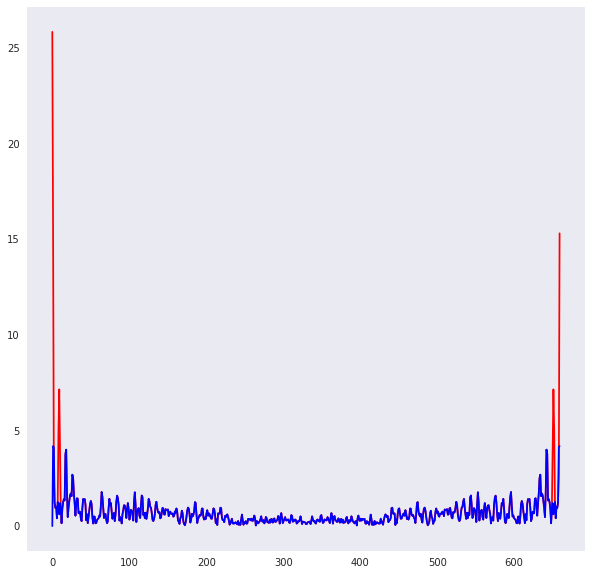

In [125]:
# Number of sample points
N = 659
# sample spacing
T = 1.0 / 659.0
x = np.linspace(0.0, N*T, N)
y=respPre
w = blackman(N)
ywf = fft(y*w)
ywf1 = fft(y*w)
xf = np.linspace(0.0, 1.0/T, N)
plt.figure(figsize = (10,10))
plt.plot(xf, np.abs(ywf), '-r')
# filtering main harmonic components
ywf1[0]=0
ywf1[1]=(ywf[0]+ywf[1]+ywf[2])/3
ywf1[2]=(ywf[1]+ywf[2]+ywf[3])/3
ywf1[8]=(ywf[7]+ywf[8]+ywf[9])/3
ywf1[9]=(ywf[8]+ywf[9]+ywf[10])/3
ywf1[10]=(ywf[9]+ywf[10]+ywf[11])/3
#ywf1[16]=(ywf[15]+ywf[16]+ywf[17])/3
#ywf1[17]=(ywf[16]+ywf[17]+ywf[18])/3
#ywf1[18]=(ywf[17]+ywf[18]+ywf[19])/3
ywf1[659-1]=(ywf[0]+ywf[1]+ywf[2])/3
ywf1[659-2]=(ywf[1]+ywf[2]+ywf[3])/3
ywf1[659-8]=(ywf[7]+ywf[8]+ywf[9])/3
ywf1[659-9]=(ywf[8]+ywf[9]+ywf[10])/3
ywf1[659-10]=(ywf[9]+ywf[10]+ywf[11])/3
#ywf1[659-16]=(ywf[15]+ywf[16]+ywf[17])/3
#ywf1[659-17]=(ywf[16]+ywf[17]+ywf[18])/3
#ywf1[659-18]=(ywf[17]+ywf[18]+ywf[19])/3
plt.plot(xf, np.abs(ywf1), '-b')
plt.grid()
plt.show()


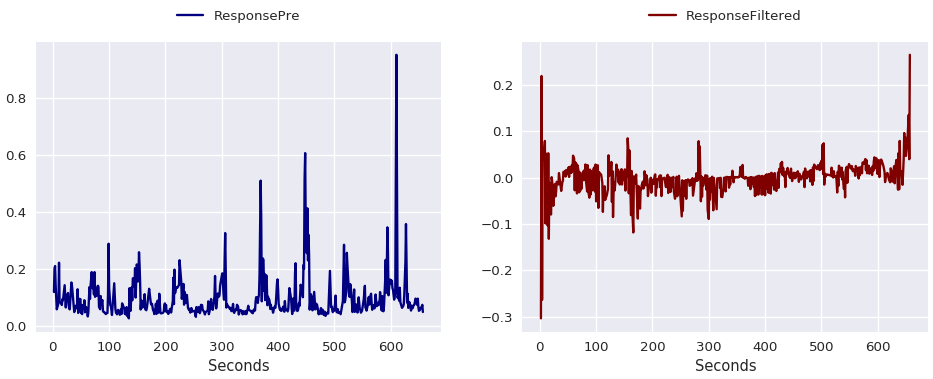

In [126]:
# 2> Reconstruct signal usoing IFFT
respPre_filtered = irfft(np.abs(ywf1))
pd_signals_filtered=pd.DataFrame(data={'ResponsePre':respPre, 'ResponseFiltered':respPre_filtered,'Seconds':timesec},dtype=float)
display(pd_signals_filtered)

In [127]:
# 4> Calculate mean and STD before & after filtering
mean_pre =respPre.mean()
std_pre=respPre.std()
print(mean_pre)
print(std_pre)
mean_filtered =respPre_filtered.mean()
std_filtered=respPre_filtered.std()
print(mean_filtered)
print(std_filtered)

0.0961095406677
0.0740354036197
-4.44763093325e-17
0.0473469945098


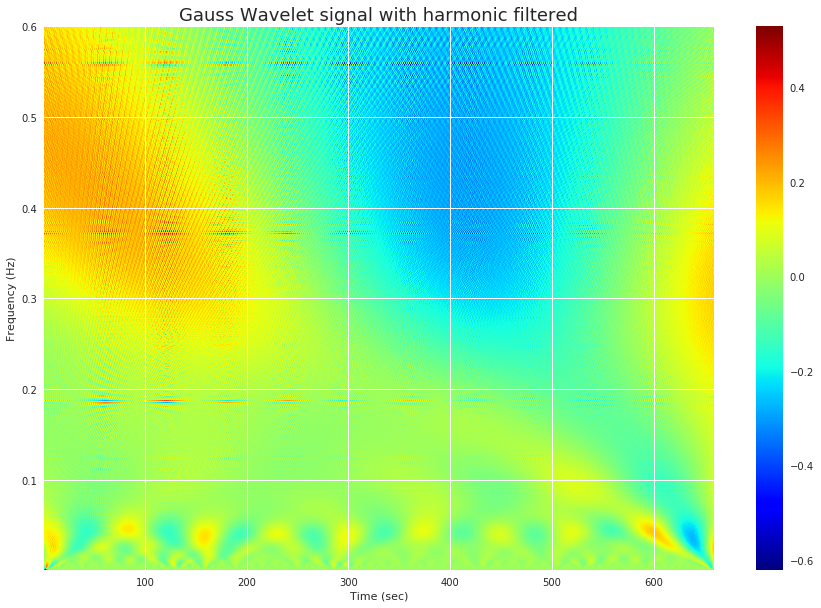

In [134]:
# 4> calculate Wavelet Gauss 7 and subtract to this the one with noise with same mean and STD 
cwtmatr_filtered, freqs = pywt.cwt(respPre_filtered, timesec, 'gaus7')
plt.figure(figsize = (15,10))
im = plt.imshow(cwtmatr_filtered, extent=[timesec.min(), timesec.max(), freqs.min(), freqs.max()], cmap='jet', aspect='auto', interpolation ='bilinear', origin='lower')
plt.colorbar(im)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet signal with harmonic filtered', fontsize=18)
plt.show() 

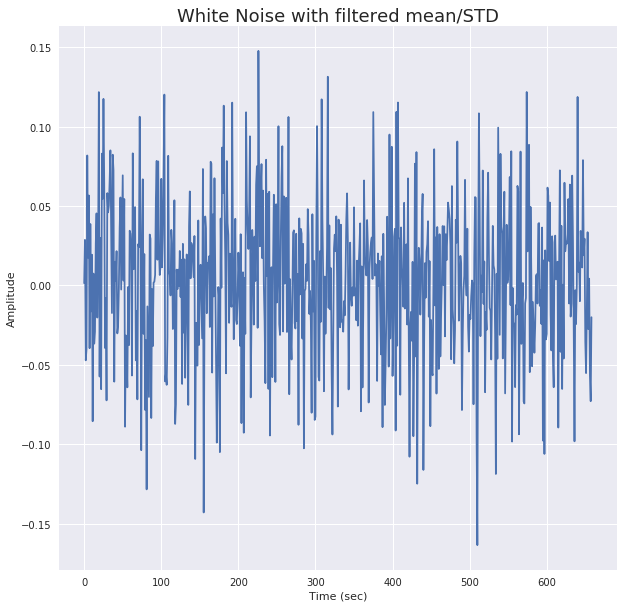

In [130]:
mean = respPre_filtered.mean()
std = respPre_filtered.std()
num_samples = 659
samples = np.random.normal(mean, std, size=num_samples)
plt.figure(figsize = (10,10))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('White Noise with filtered mean/STD', fontsize=18)
plt.plot(samples)
plt.show()

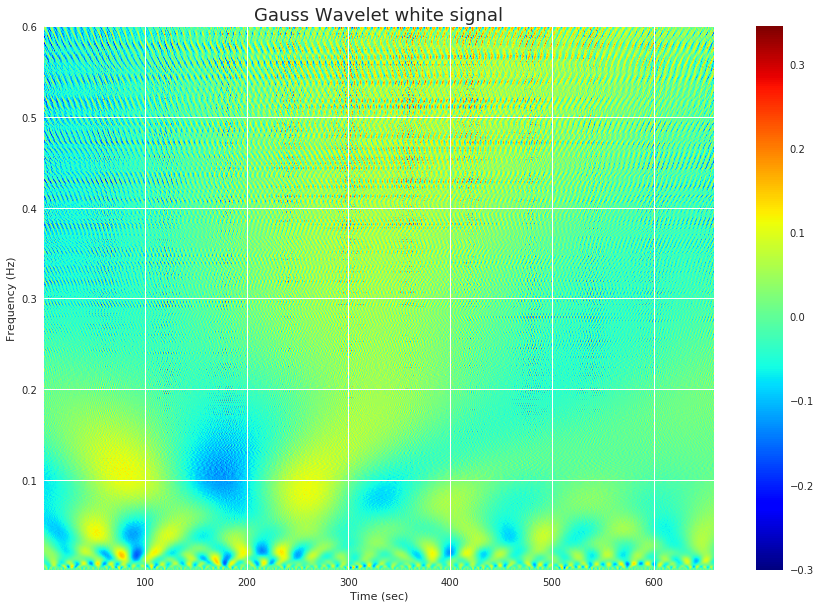

In [135]:
#white signal wavelet
cwtmatrw, freqsw = pywt.cwt(samples, timesec, 'gaus7')
plt.figure(figsize = (15,10))
im1=plt.imshow(cwtmatrw, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet', aspect='auto',interpolation ='bilinear',origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss Wavelet white signal', fontsize=18)
plt.show() 

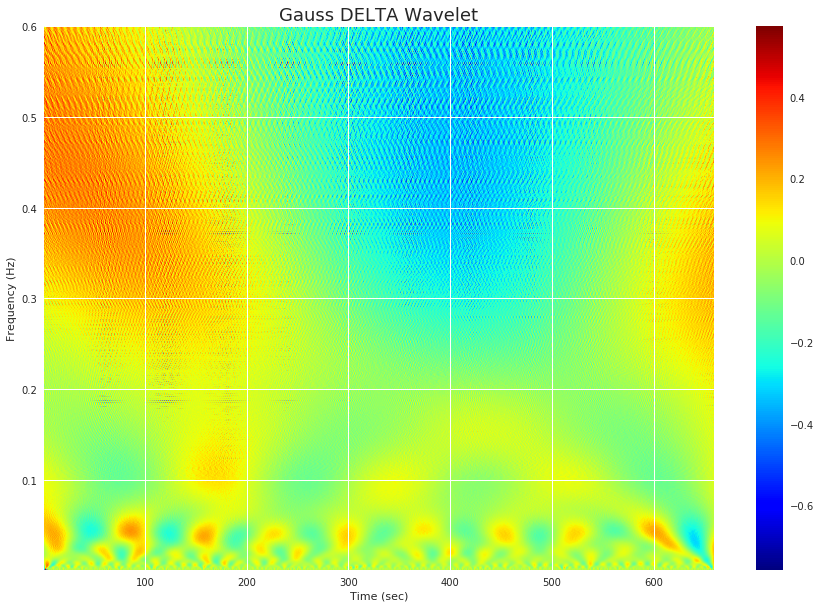

In [136]:
#delta wavelet between filtered (no main harmonic) signal and withe noise wavelet
cwtmatrd=cwtmatr_filtered-cwtmatrw
plt.figure(figsize = (15,10))
im1=plt.imshow(cwtmatrd, extent=[timesec.min(), timesec.max(), freqsw.min(), freqsw.max()], cmap='jet', aspect='auto',interpolation ='bilinear', origin='lower')
plt.colorbar(im1)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Gauss DELTA Wavelet', fontsize=18)
plt.show() 